In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
batch_size = 32
img_height = 180
img_width = 180
data_dir = os.path.join("form test")
data_dir

'form test'

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 181 files belonging to 4 classes.
Using 145 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 181 files belonging to 4 classes.
Using 36 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['1', '2', '3', '4']


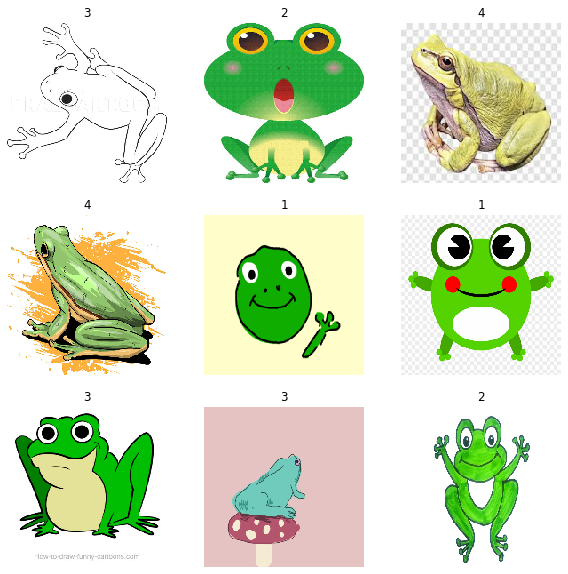

In [6]:

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [10]:
num_classes = 4

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [13]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
5/5 [==============================] - 7s 1s/step - loss: 2.6084 - accuracy: 0.2375 - val_loss: 1.6038 - val_accuracy: 0.5278
Epoch 2/10
5/5 [==============================] - 4s 734ms/step - loss: 1.9019 - accuracy: 0.3366 - val_loss: 1.3471 - val_accuracy: 0.3333
Epoch 3/10
5/5 [==============================] - 4s 736ms/step - loss: 1.3296 - accuracy: 0.3794 - val_loss: 1.3188 - val_accuracy: 0.4722
Epoch 4/10
5/5 [==============================] - 4s 736ms/step - loss: 1.2994 - accuracy: 0.4033 - val_loss: 1.3361 - val_accuracy: 0.5000
Epoch 5/10
5/5 [==============================] - 4s 735ms/step - loss: 1.2035 - accuracy: 0.5809 - val_loss: 1.3592 - val_accuracy: 0.3333
Epoch 6/10
5/5 [==============================] - 4s 812ms/step - loss: 1.1301 - accuracy: 0.5094 - val_loss: 1.3868 - val_accuracy: 0.1944
Epoch 7/10
5/5 [==============================] - 4s 737ms/step - loss: 1.0141 - accuracy: 0.6351 - val_loss: 1.3319 - val_accuracy: 0.2778
Epoch 8/10
5/5 [=======

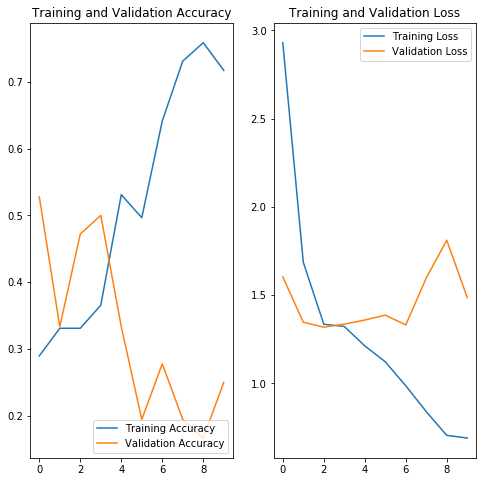

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

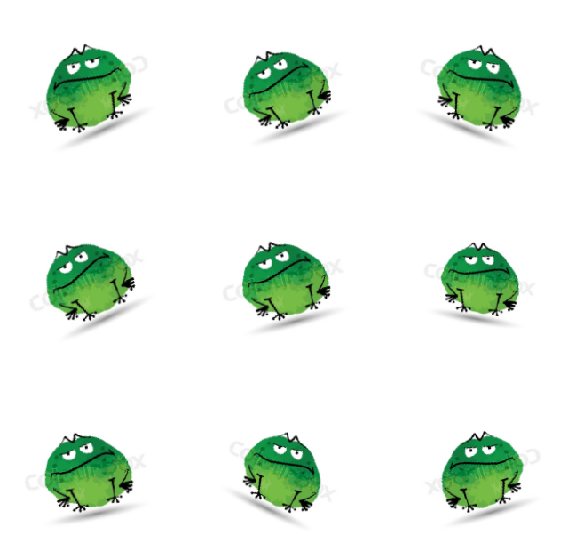

In [18]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [19]:
#Model using Dropout and Data Augmentation
model2 = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [19]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [20]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
5/5 [==============================] - 4s 747ms/step - loss: 0.4970 - accuracy: 0.8264 - val_loss: 1.9421 - val_accuracy: 0.3333
Epoch 2/10
5/5 [==============================] - 4s 813ms/step - loss: 0.4201 - accuracy: 0.8333 - val_loss: 1.5948 - val_accuracy: 0.3889
Epoch 3/10
5/5 [==============================] - 4s 725ms/step - loss: 0.3300 - accuracy: 0.9097 - val_loss: 2.0215 - val_accuracy: 0.3333
Epoch 4/10
5/5 [==============================] - 4s 752ms/step - loss: 0.2566 - accuracy: 0.9097 - val_loss: 2.1941 - val_accuracy: 0.3333
Epoch 5/10
5/5 [==============================] - 4s 811ms/step - loss: 0.1920 - accuracy: 0.9444 - val_loss: 2.1023 - val_accuracy: 0.4167
Epoch 6/10
5/5 [==============================] - 4s 730ms/step - loss: 0.1840 - accuracy: 0.9653 - val_loss: 2.8078 - val_accuracy: 0.3056
Epoch 7/10
5/5 [==============================] - 4s 730ms/step - loss: 0.1191 - accuracy: 0.9861 - val_loss: 2.8526 - val_accuracy: 0.3056
Epoch 8/10
5/5 [====

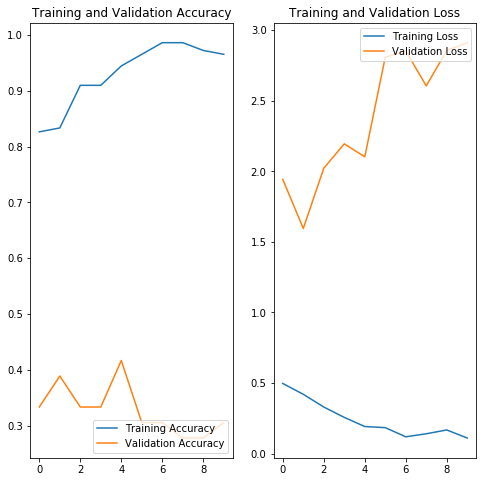

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
#Test on New Data

frog_path = os.path.join("realistic_frog.png")
img = keras.preprocessing.image.load_img(
    frog_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to 2 with a 33.63 percent confidence.


In [18]:
model.save("models/form_model")

INFO:tensorflow:Assets written to: models/form_model\assets


In [ ]:
##COLOR TEST

In [3]:

color_dir = os.path.join("color test")
color_dir

'color test'

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  color_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 174 files belonging to 4 classes.
Using 140 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  color_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 174 files belonging to 4 classes.
Using 34 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['1', '2', '3', '4']


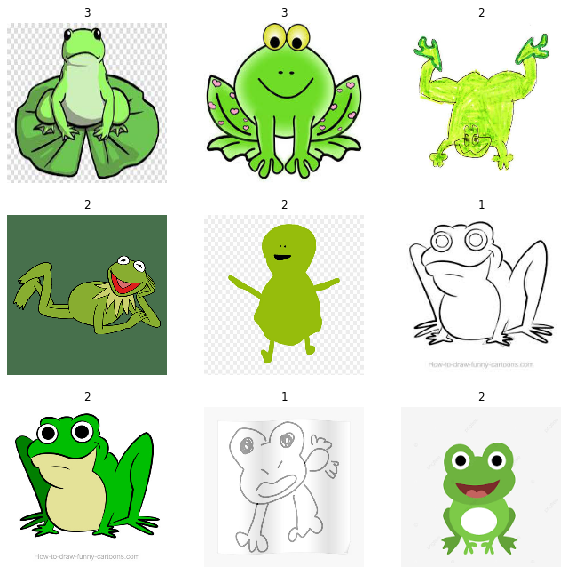

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [11]:
num_classes = 4

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [14]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
5/5 [==============================] - 7s 1s/step - loss: 1.4895 - accuracy: 0.2534 - val_loss: 1.2621 - val_accuracy: 0.4706
Epoch 2/10
5/5 [==============================] - 4s 715ms/step - loss: 1.1875 - accuracy: 0.4581 - val_loss: 1.1894 - val_accuracy: 0.5000
Epoch 3/10
5/5 [==============================] - 4s 725ms/step - loss: 1.1477 - accuracy: 0.5253 - val_loss: 1.0662 - val_accuracy: 0.6176
Epoch 4/10
5/5 [==============================] - 4s 715ms/step - loss: 0.8710 - accuracy: 0.7427 - val_loss: 0.9024 - val_accuracy: 0.6471
Epoch 5/10
5/5 [==============================] - 4s 714ms/step - loss: 0.6789 - accuracy: 0.7468 - val_loss: 0.8700 - val_accuracy: 0.6471
Epoch 6/10
5/5 [==============================] - 4s 709ms/step - loss: 0.5053 - accuracy: 0.8365 - val_loss: 0.8609 - val_accuracy: 0.6471
Epoch 7/10
5/5 [==============================] - 4s 756ms/step - loss: 0.3439 - accuracy: 0.8996 - val_loss: 0.9233 - val_accuracy: 0.6176
Epoch 8/10
5/5 [=======

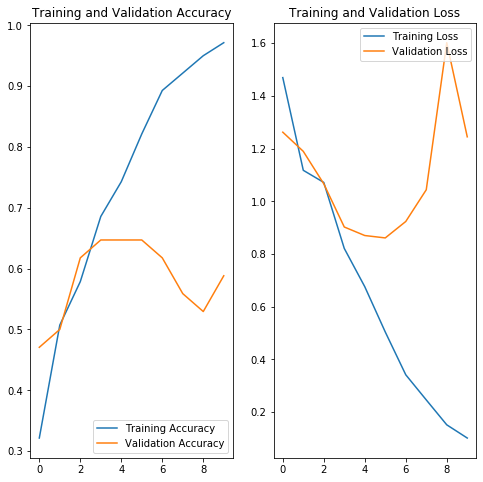

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
#Test on New Data

#sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
#sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
frog_path = os.path.join("test frog.png")
img = keras.preprocessing.image.load_img(
    frog_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to 3 with a 95.65 percent confidence.


In [18]:
model.save("models/color_model")

INFO:tensorflow:Assets written to: models/color_model\assets
